### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfig, EngineConfigurationChannel

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]


### 3. Start the environment
`UnityEnvironment` launches and begins communication with the environment when instantiated.

Environments contain _brains_ which are responsible for deciding the actions of their associated _agents_. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
engine_configuration_channel = EngineConfigurationChannel()
env_name="./Build/PoliceInt.exe"
env = UnityEnvironment(file_name=env_name, side_channels = [engine_configuration_channel])

#Reset the environment
env.reset()

# Set the default brain to work with
group_name = env.get_agent_groups()[0]
group_spec = env.get_agent_group_spec(group_name)

# Set the time scale of the engine
engine_configuration_channel.set_configuration_parameters(time_scale = 3.0)

### 4. Examine the observation and state spaces
We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, _states_ refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, _observations_ refer to a set of relevant pixel-wise visuals for an agent.

Number of observations :  3
Is there a visual observation ? True
Agent visual observation looks like:


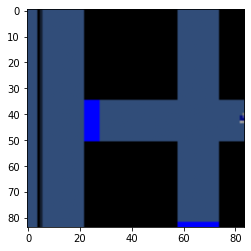

In [3]:
# Get the state of the agents
step_result = env.get_step_result(group_name)

# Examine the number of observations per Agent
print("Number of observations : ", len(group_spec.observation_shapes))

# Is there a visual observation ?
vis_obs = any([len(shape) == 3 for shape in group_spec.observation_shapes])
print("Is there a visual observation ?", vis_obs)

# Examine the visual observations
if vis_obs:
    vis_obs_index = next(i for i,v in enumerate(group_spec.observation_shapes) if len(v) == 3)
    print("Agent visual observation looks like:")
    obs = step_result.obs[vis_obs_index]
    plt.imshow(obs[0,:,:,:])
else:
    # Examine the state space for the first observation for the first agent
    print("First Agent observation looks like: \n{}".format(step_result.obs[0][0]))

### 5. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions based on the `action_space_type` of the default brain.

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [4]:
for episode in range(1000000):
    env.reset()
    step_result = env.get_step_result(group_name)
    done = False
    episode_rewards = 0
    while not done:
        action_size = group_spec.action_size
        if group_spec.is_action_continuous():
            action = np.random.randn(step_result.n_agents(), group_spec.action_size)
            
        if group_spec.is_action_discrete():
            branch_size = group_spec.discrete_action_branches
            action = np.column_stack([np.random.randint(0, branch_size[i], size=(step_result.n_agents())) for i in range(len(branch_size))])
        env.set_actions(group_name, action)
        env.step()
        step_result = env.get_step_result(group_name)
        episode_rewards += step_result.reward[0]
        done = step_result.done[0]
    print("Total reward this episode: {}".format(episode_rewards)+" Episode "+ str(episode))

Total reward this episode: -10.379999697208405 Episode 0
Total reward this episode: -10.939999863505363 Episode 1
Total reward this episode: -15.509999826550484 Episode 2
Total reward this episode: -10.939999863505363 Episode 3
Total reward this episode: -13.320000097155571 Episode 4
Total reward this episode: -2.799999602138996 Episode 5
Total reward this episode: -10.360000193119049 Episode 6
Total reward this episode: 0.07000012695789337 Episode 7
Total reward this episode: -11.670000277459621 Episode 8
Total reward this episode: -11.670000277459621 Episode 9
Total reward this episode: 0.9900000095367432 Episode 10
Total reward this episode: -2.249999664723873 Episode 11
Total reward this episode: -10.45000034570694 Episode 12
Total reward this episode: -10.45000034570694 Episode 13
Total reward this episode: -10.939999863505363 Episode 14
Total reward this episode: -2.0499996840953827 Episode 15
Total reward this episode: -11.179999805986881 Episode 16
Total reward this episode: 0.

Total reward this episode: -2.16999963670969 Episode 142
Total reward this episode: -4.239999413490295 Episode 143
Total reward this episode: -12.400000132620335 Episode 144
Total reward this episode: -14.059999786317348 Episode 145
Total reward this episode: 0.8099999949336052 Episode 146
Total reward this episode: -10.939999863505363 Episode 147
Total reward this episode: -10.370000422000885 Episode 148
Total reward this episode: -13.929999306797981 Episode 149
Total reward this episode: -11.479999773204327 Episode 150
Total reward this episode: -14.639999657869339 Episode 151
Total reward this episode: -10.939999863505363 Episode 152
Total reward this episode: -8.399998992681503 Episode 153
Total reward this episode: 0.12000010162591934 Episode 154
Total reward this episode: -2.349999651312828 Episode 155
Total reward this episode: -13.150000050663948 Episode 156
Total reward this episode: -11.650000214576721 Episode 157
Total reward this episode: -10.379999697208405 Episode 158
Tot

UnityTimeOutException: The Unity environment took too long to respond. Make sure that :
	 The environment does not need user interaction to launch
	 The Agents are linked to the appropriate Brains
	 The environment and the Python interface have compatible versions.

### 6. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [ ]:
env.close()
